# Implementing Linear Regression in Python

### 1. Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Color for matplotlib
from matplotlib import cm
import matplotlib as mpl

In [2]:
%matplotlib inline
#Using tex for matplotlib axis 
mpl.rcParams['text.usetex'] = True

### 2. Import Data
Housing price in Portland, Oregon. The data has been taken from the Coursera course "Machine Learning"

In [3]:
df_2 = pd.read_csv("./ex1data2.txt", names = ["Size of the house (in sq. ft.)", "\# of bedrooms", "Price of the house (in \$1000s)"])

In [4]:
df_2.iloc[:, 2] = df_2.loc[:, "Price of the house (in \$1000s)"].div(1000)

In [5]:
df_2.head()

,Size of the house (in sq. ft.),\# of bedrooms,Price of the house (in \$1000s)
0,2104,3,399.9
1,1600,3,329.9
2,2400,3,369.0
3,1416,2,232.0
4,3000,4,539.9


### 3. Plotting to show the Linear Relationship

In [6]:
axis_font_size = 14

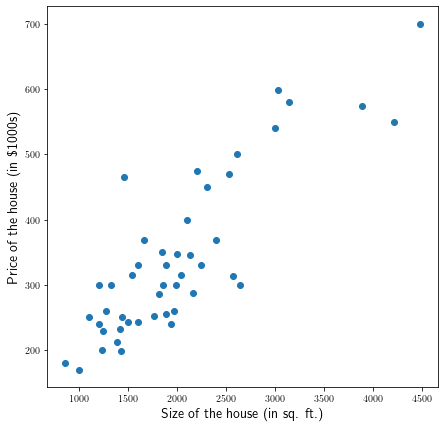

In [7]:
width, height = [7,7]
fig = plt.figure(figsize=(width,height))
plt.scatter(df_2.iloc[:, 0], df_2.iloc[:, 2])
plt.xlabel(df_2.columns[0], fontsize = axis_font_size )
plt.ylabel(df_2.columns[2], fontsize= axis_font_size )
plt.savefig("uni_var_relationship", dpi = 300)
plt.show()

Adding additional feature "# of bathrooms" can be shown as below

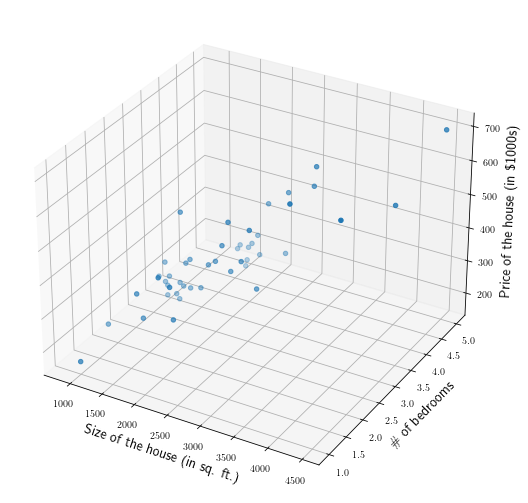

In [8]:
width, height = [9,9]
fig = plt.figure(figsize=(width,height))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_2.iloc[:, 0], df_2.iloc[:, 1], df_2.iloc[:, 2])

# Labels of axis 
ax.set_xlabel(df_2.columns[0], fontsize= axis_font_size )
ax.set_ylabel(df_2.columns[1], fontsize = axis_font_size )
ax.set_zlabel(df_2.columns[2], fontsize = axis_font_size )
plt.savefig("multi_var_relationship", dpi = 300)
plt.show()

## Univariate 
This will use Size of the house in (sq. ft) as a input variable and price of the house as target variable

### 3. Define $x,\theta, y$

In [9]:
x = df_2.iloc[:, 0]
theta = [0, 0]
y = df_2.iloc[:, 2]

### 4. Define Hypothesis
$h(x) = \theta_0 + \theta_1 * x$

In [10]:
def hypothesis(x, theta):
    return (theta[0] + theta[1] * x)

### 5. Calculate Cost
Define function J

$J(\theta_0,\theta_1) = \frac{1}{2m} \sum _{i=1}^m (h(x^{(i)}) - y^{(i)})^2$

In [11]:
def uni_mse(x, y, theta):
    squared_sum = 0
    m = y.size
    for i_th in range(x.size):
        squared_sum += np.square(hypothesis(x[i_th], theta) - y[i_th])
    return (1/ (2*m) * squared_sum)
    

### 6. Visualize the cost function 
This gives the appropriate indication and example, that using MSE error gives the global minima, meaning that there is only one minimum point possible. 

Inspired by the examplary code from Coursera

In [13]:
# Define the range of theta 0 and theta 1, where the cost will be visualized 
theta0_val = np.linspace(-1000, 2000, 100)
theta1_val = np.linspace(-1.5, 1.5, 100)

# Set up zero matrix, so that the combination of each theta 0 and theta 1 can generate the error
J_vals = np.zeros((theta0_val.size, theta1_val.size))

for i in range(theta0_val.size):
    for j in range(theta1_val.size):
        theta = [theta0_val[i], theta1_val[j]]
        J_vals[i, j] = uni_mse(x, y, theta)
J_vals = np.matrix.transpose(J_vals)

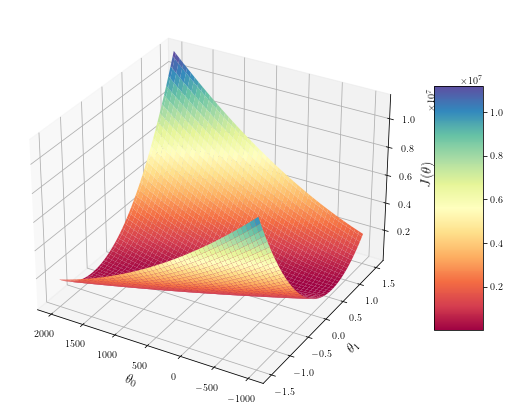

In [14]:
fig = plt.figure(figsize = (9,9))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(theta0_val, theta1_val)

surface = ax.plot_surface(X, Y, J_vals, cmap = cm.Spectral)
ax.set_xlabel(r'$\theta_0$', fontsize=axis_font_size)
ax.set_ylabel(r'$\theta_1$', fontsize=axis_font_size)
ax.set_zlabel(r'$J(\theta)$', fontsize=axis_font_size)
ax.invert_xaxis()

fig.colorbar(surface, shrink=0.5, aspect=5)

plt.savefig("surface_cost_actual", dpi = 300)
plt.show()

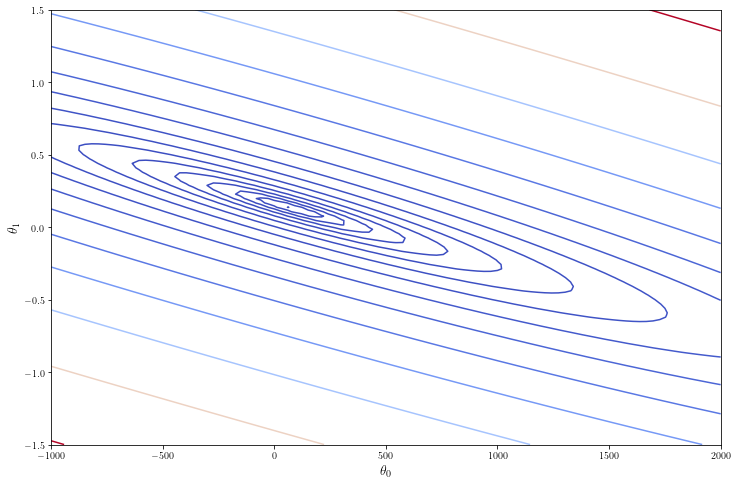

In [15]:
X, Y = np.meshgrid(theta0_val, theta1_val)
fig,ax=plt.subplots(1,1, figsize=(12,8))
contour = ax.contour(X, Y, J_vals, np.logspace(-5, 7),  cmap = cm.coolwarm)
ax.set_xlabel(r'$\theta_0$', fontsize=axis_font_size)
ax.set_ylabel(r'$\theta_1$', fontsize=axis_font_size)
plt.savefig("contour_cost_actual", dpi = 300)
plt.show()

## Multivariate with vectorization

### 3. Redefine $X$, $\theta$, and $y$

In [19]:
train_data = df_2.iloc[:, :2]
X = np.column_stack((np.ones(train_data.shape[0]), train_data))

theta = np.zeros(X.shape[1])
y = df_2.iloc[:, 2]

### 4. Define Hypothesis
$h(x) = \theta_0x_0 + \theta_1 * x_1 +\ldots+\theta_nx_n = X \cdot \theta $

In [20]:
def multi_hyp(X, theta):
    return X @ theta

### 5. Calculate Cost
Define function J

$J(\theta) = \frac{1}{2m}(\theta^TX^TX\theta-2(X\theta)^Ty+y^Ty)$

In [18]:
def multi_cost(X, y, theta):
    m = y.size
    return(1/(2*m) * (np.transpose(theta)@np.transpose(X)@X@theta - 2 * np.transpose(X@theta)@y + np.transpose(y)@y))